# Capstone Project (Nuraina Binti Chik)

## 1️⃣ Capstone - Superstore:

Mohd Gana, CEO of a mid-sized retail company, has observed a rise in customer complaints related to delayed deliveries. Concerned about the potential impact on customer satisfaction and business reputation, he is seeking a deeper understanding of the root causes. 
 
To support this, Mohd Gana has requested a data analysis project to explore patterns in shipping performance, sales trends, and customer behavior. The goal is to uncover insights that can help the sales and product teams improve fulfillment processes and better serve different customer segments. 

## 2️⃣ Scoping Your Data Analysis Project

- What are the big questions that you are exploring?
1. Which products are driving the most sales? 
2. Which shipping methods are leading to delays? 
3. Which customer segments are most profitable? 
- The datasets that will be use in this projects are customers,orders,product and shipping.
- To identify top selling product and customer's business segment, and explore delivery late pattern. 

## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (customers and orders).




In [1]:
# Import customer and orders data 
import pandas as pd

customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")

customers.head()

,Customer ID,Name,Gender,Segment
0,CS0001,Li Wei,Male,Consumer
1,CS0002,Chen Jia,Female,Consumer
2,CS0003,Zhang Lei,Male,Corporate
3,CS0004,Wang Fang,Female,Consumer
4,CS0005,Liu Ying,Female,Consumer


In [2]:
orders.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.9136
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.5820
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.8714
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,-383.0310
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.5164


In [3]:
# Check for missing value in customers and orders data
customers.info()
orders.info()

# Check for missing values
print("Missing Values Count:\n", customers.isnull().sum())
# Display rows with missing values
customers[customers.isnull().any(axis=1)]

# Check for missing values
print("Missing Values Count:\n", orders.isnull().sum())
# Display rows with missing values
orders[orders.isnull().any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1238 non-null   object
 1   Name         1238 non-null   object
 2   Gender       1238 non-null   object
 3   Segment      1238 non-null   object
dtypes: object(4)
memory usage: 38.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order ID               1238 non-null   object 
 1   Order Date             1238 non-null   object 
 2   Ship Code              1238 non-null   object 
 3   Ship Reference Number  1238 non-null   int64  
 4   Shipping ID            1238 non-null   object 
 5   Payment method         1238 non-null   object 
 6   Customer ID            1238 non-null   object 
 7   Product Category ID    1238

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit


In [4]:
# Check for duplicates for customers data
duplicates = customers.duplicated().sum()
print (f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print ("Duplicate rows found:")
    display (customers[customers.duplicated(keep=False)])
# Show all duplicate rows (including forst occurrence)

# Remove duplicates if necessary
df_cleaned1 = customers.drop_duplicates()

#Verify removal
print (f"Number of duplicate rows after removal: {df_cleaned1.duplicated().sum()}")

customers.shape

Number of duplicate rows: 696
Duplicate rows found:


,Customer ID,Name,Gender,Segment
3,CS0004,Wang Fang,Female,Consumer
4,CS0005,Liu Ying,Female,Consumer
11,CS0012,Siti Nur,Female,Consumer
12,CS0013,Hafiz Ismail,Male,Consumer
17,CS0018,Siti Masliha,Female,Consumer
...,...,...,...,...
1233,CS0539,Bobby Suan,Male,Consumer
1234,CS0539,Bobby Suan,Male,Consumer
1235,CS0541,Li Wei,Male,Consumer
1236,CS0541,Li Wei,Male,Consumer


Number of duplicate rows after removal: 0


(1238, 4)

In [5]:
# Check for duplicates in orders data
duplicates = orders.duplicated().sum()
print (f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print ("Duplicate rows found:")
    display (customers[orders.duplicated(keep=False)])
# Show all duplicate rows (including forst occurrence)

# Remove duplicates if necessary
df_cleaned2 = orders.drop_duplicates()

#Verify removal
print (f"Number of duplicate rows after removal: {df_cleaned2.duplicated().sum()}")

orders.shape

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


(1238, 12)

In [6]:
# Convert 'Order Date' column from datetime format into a string formatted
orders["Order Date"] = pd.to_datetime(orders["Order Date"], errors="coerce", dayfirst=True).dt.strftime("%d-%m-%Y")
orders.head()

C:\Users\Aina.C\AppData\Local\Temp\ipykernel_34844\1301073991.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  orders["Order Date"] = pd.to_datetime(orders["Order Date"], errors="coerce", dayfirst=True).dt.strftime("%d-%m-%Y")


,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.9136
1,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.5820
2,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.8714
3,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,-383.0310
4,OD0005,22-05-2023,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.5164


In [7]:
# Replace null or negative prices with median price
orders["Profit"] = orders["Profit"].apply(lambda x: x if pd.notnull(x) and x > 0 else orders ["Profit"].median())

#Verify if any prices are still missing or invalid
orders[orders["Profit"] <= 0]

orders.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.91360
1,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.58200
2,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.87140
3,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,7.68825
4,OD0005,22-05-2023,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.51640


## Export the Cleaned Dataset 
After applying the cleaning and transformations on customers and orders data, saved the cleaned dataset for further analysis. 

In [21]:
# Define the file path for saving
output_file = "Cleaned_customers.csv"

# Export the cleaned dataset
df_cleaned1. to_csv(output_file, index=False)

print (f"Cleaned dataset has been successfully saved as: {output_file}")

Cleaned dataset has been successfully saved as: Cleaned_customers.csv


In [22]:
# Define the file path for saving
output_file = "Cleaned_orders.csv"

# Export the cleaned dataset
orders.to_csv(output_file, index=False)

print (f"Cleaned dataset has been successfully saved as: {output_file}")

Cleaned dataset has been successfully saved as: Cleaned_orders.csv


### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (product and shipping).

### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis



In [8]:
# Import product and shipping data
import pandas as pd

product = pd.read_csv("product.csv")
shipping = pd.read_csv("shipping.csv")

product.head()

,Product Category ID,Category,Sub-Category
0,FUR001,Furniture,Bookcases
1,FUR002,Furniture,Chairs
2,OS006,Office Supplies,Labels
3,FUR004,Furniture,Tables
4,OS008,Office Supplies,Storage


In [9]:
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000


In [10]:
# Check for missing value in product and shipping data
product.info()
shipping.info()

# Check for missing values
print("Missing Values Count:\n", product.isnull().sum())
# Display rows with missing values
product[product.isnull().any(axis=1)]

# Check for missing values
print("Missing Values Count:\n", shipping.isnull().sum())
# Display rows with missing values
shipping[shipping.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category ID  1238 non-null   object
 1   Category             1238 non-null   object
 2   Sub-Category         1238 non-null   object
dtypes: object(3)
memory usage: 29.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Shipping ID                  1238 non-null   object
 1   Ship Mode                    1238 non-null   object
 2   Courier                      1238 non-null   object
 3   Order Date                   1238 non-null   object
 4   Delivered Date               1238 non-null   object
 5   Delivery Timing              1238 non-null   object
 6   City, State and Postal code  1238 non-nul

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"


In [12]:
# Check for duplicates in product data
duplicates = product.duplicated().sum()
print (f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print ("Duplicate rows found:")
    display (product[product.duplicated(keep=False)])
# Show all duplicate rows (including forst occurrence)

# Remove duplicates if necessary
df_cleaned3 = product.drop_duplicates()

#Verify removal
print (f"Number of duplicate rows after removal: {df_cleaned3.duplicated().sum()}")

product.shape

Number of duplicate rows: 1221
Duplicate rows found:


,Product Category ID,Category,Sub-Category
0,FUR001,Furniture,Bookcases
1,FUR002,Furniture,Chairs
2,OS006,Office Supplies,Labels
3,FUR004,Furniture,Tables
4,OS008,Office Supplies,Storage
...,...,...,...
1233,OS001,Office Supplies,Appliances
1234,OS001,Office Supplies,Appliances
1235,TEC001,Technology,Accessories
1236,TEC001,Technology,Accessories


Number of duplicate rows after removal: 0


(1238, 3)

In [11]:
# Check for duplicates in shipping data
duplicates = shipping.duplicated().sum()
print (f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print ("Duplicate rows found:")
    display (shipping[shipping.duplicated(keep=False)])
# Show all duplicate rows (including forst occurrence)

# Remove duplicates if necessary
df_cleaned4 = shipping.drop_duplicates()

#Verify removal
print (f"Number of duplicate rows after removal: {df_cleaned4.duplicated().sum()}")

shipping.shape

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


(1238, 7)

In [7]:
#Checking the unique categories in the delivery timing column
print("Unique values in delivery timing:",shipping["Delivery Timing"].unique())
print("Missing values in delivery timing:",shipping["Delivery Timing"].isnull().sum())

Unique values in delivery timing: ['#DIV/0!' 'Early' 'On time' 'Late']
Missing values in delivery timing: 0


In [13]:
# Convert the Columns to Datetime
shipping['Order Date'] = pd.to_datetime(shipping['Order Date'])
shipping['Delivered Date'] = pd.to_datetime(shipping['Delivered Date'])

# Calculate the days taken to deliver and create new columns with number of the days 'Days'.
shipping['Days'] = (shipping['Delivered Date'] - shipping['Order Date']).dt.days
shipping.head(10)

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200,20
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000,20
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000,20
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000,30
5,AE-2023-3179243,Standard Class,Hero Van,2023-05-23,2023-06-02,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000,10
6,AE-2023-3323423,Standard Class,Parcel Express,2023-05-03,2023-05-23,#DIV/0!,George Town-Penang-10200,20
7,AE-2023-3371820,Standard Class,HomeLaju,2023-05-24,2023-06-03,#DIV/0!,Johor Bahru-Johor-80000,10
8,AE-2023-350473,Standard Class,Parcel Express,2023-05-17,2023-06-06,#DIV/0!,Kota Kinabalu-Sabah-88000,20
9,AE-2023-4073208,Standard Class,HomeLaju,2023-05-11,2023-06-10,#DIV/0!,Kuching-Sarawak-93000,30


In [14]:
# Convert 'Order Date' column from datetime format into a string formatted
shipping["Order Date"] = pd.to_datetime(shipping["Order Date"], errors="coerce", dayfirst=True).dt.strftime("%d-%m-%Y")

# Convert 'Order Date' column from datetime format into a string formatted
shipping["Delivered Date"] = pd.to_datetime(shipping["Delivered Date"], errors="coerce", dayfirst=True).dt.strftime("%d-%m-%Y")
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,AE-2023-1231682,Second Class,Parcel Express,28-05-2023,17-06-2023,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,AE-2023-1263608,Second Class,Parcel Express,23-05-2023,12-06-2023,#DIV/0!,George Town-Penang-10200,20
2,AE-2023-303016,Second Class,Hero Van,17-05-2023,06-06-2023,#DIV/0!,Johor Bahru-Johor-80000,20
3,AE-2023-304471,Standard Class,HomeLaju,23-05-2023,12-06-2023,#DIV/0!,Kota Kinabalu-Sabah-88000,20
4,AE-2023-3123605,Standard Class,HomeLaju,22-05-2023,21-06-2023,#DIV/0!,Kuching-Sarawak-93000,30


In [16]:
# Define function to classify delivery timing
def classify_timing(days):
    if pd.isnull(days):
        return 'Unknown'
    elif days <= 10:
        return 'Early'
    elif days  <= 20:
        return 'On Time'
    else:
        return 'Late'

# Replace error-like values ('#DIV/0!') in 'Delivery Timing' with correct labels
shipping['Delivery Timing'] = shipping['Days'].apply(classify_timing)

shipping.head()


,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,AE-2023-1231682,Second Class,Parcel Express,28-05-2023,17-06-2023,On Time,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,AE-2023-1263608,Second Class,Parcel Express,23-05-2023,12-06-2023,On Time,George Town-Penang-10200,20
2,AE-2023-303016,Second Class,Hero Van,17-05-2023,06-06-2023,On Time,Johor Bahru-Johor-80000,20
3,AE-2023-304471,Standard Class,HomeLaju,23-05-2023,12-06-2023,On Time,Kota Kinabalu-Sabah-88000,20
4,AE-2023-3123605,Standard Class,HomeLaju,22-05-2023,21-06-2023,Late,Kuching-Sarawak-93000,30


# Export the Cleaned Dataset 
After applying the cleaning and transformations, saved the cleaned dataset for further analysis. 

In [67]:
# Define the file path for saving
output_file = "Cleaned_product.csv"

# Export the cleaned dataset
df_cleaned3.to_csv(output_file, index=False)

print (f"Cleaned dataset has been successfully saved as: {output_file}")

Cleaned dataset has been successfully saved as: Cleaned_product.csv


In [68]:
# Define the file path for saving
output_file = "Cleaned_shipping.csv"

# Export the cleaned dataset
shipping.to_csv(output_file, index=False)

print (f"Cleaned dataset has been successfully saved as: {output_file}")

Cleaned dataset has been successfully saved as: Cleaned_shipping.csv


### Data Joining:

- Join the datasets using a unique identifier.
- Perform groupby to uncover relationships between variables.


In [19]:
# Import the clean data
import pandas as pd

# Load the dataset
customers = pd.read_csv("Cleaned_customers.csv")
order = pd.read_csv("Cleaned_orders.csv")
product = pd.read_csv("Cleaned_product.csv")
shipping = pd.read_csv("Cleaned_shipping.csv")

customers.head()

,Customer ID,Name,Gender,Segment
0,CS0001,Li Wei,Male,Consumer
1,CS0002,Chen Jia,Female,Consumer
2,CS0003,Zhang Lei,Male,Corporate
3,CS0004,Wang Fang,Female,Consumer
4,CS0005,Liu Ying,Female,Consumer


In [20]:
order.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.91360
1,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.58200
2,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.87140
3,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,7.68825
4,OD0005,22-05-2023,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.51640


In [21]:
customers.shape

(542, 4)

In [22]:
order.shape

(1238, 12)

In [23]:
# Merge clean customers and orders data
merge_df = customers.merge(order, on="Customer ID", how="left")
merge_df.head()

,Customer ID,Name,Gender,Segment,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Product Category ID,Sales,Quantity,Discount,Profit
0,CS0001,Li Wei,Male,Consumer,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,FUR001,261.9600,2,0.00,41.91360
1,CS0002,Chen Jia,Female,Consumer,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,FUR002,731.9400,3,0.00,219.58200
2,CS0003,Zhang Lei,Male,Corporate,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,OS006,14.6200,2,0.00,6.87140
3,CS0004,Wang Fang,Female,Consumer,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,FUR004,957.5775,5,0.45,7.68825
4,CS0004,Wang Fang,Female,Consumer,OD0544,03-05-2023,CA-2023,12189,CA-2023-12189,Visa,FUR004,957.5775,5,0.45,7.68825


In [24]:
product.head()

,Product Category ID,Category,Sub-Category
0,FUR001,Furniture,Bookcases
1,FUR002,Furniture,Chairs
2,OS006,Office Supplies,Labels
3,FUR004,Furniture,Tables
4,OS008,Office Supplies,Storage


In [25]:
# 2nd step, merge the merge_df with product data
merge2_df = merge_df.merge(product, on="Product Category ID", how="left")
merge2_df.head()

,Customer ID,Name,Gender,Segment,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Product Category ID,Sales,Quantity,Discount,Profit,Category,Sub-Category
0,CS0001,Li Wei,Male,Consumer,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,FUR001,261.9600,2,0.00,41.91360,Furniture,Bookcases
1,CS0002,Chen Jia,Female,Consumer,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,FUR002,731.9400,3,0.00,219.58200,Furniture,Chairs
2,CS0003,Zhang Lei,Male,Corporate,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,OS006,14.6200,2,0.00,6.87140,Office Supplies,Labels
3,CS0004,Wang Fang,Female,Consumer,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,FUR004,957.5775,5,0.45,7.68825,Furniture,Tables
4,CS0004,Wang Fang,Female,Consumer,OD0544,03-05-2023,CA-2023,12189,CA-2023-12189,Visa,FUR004,957.5775,5,0.45,7.68825,Furniture,Tables


In [27]:
# Merge again with shipping data
mergeall_df = merge2_df.merge(shipping, on="Shipping ID", how="left")
mergeall_df.head()

,Customer ID,Name,Gender,Segment,Order ID,Order Date_x,Ship Code,Ship Reference Number,Shipping ID,Payment method,...,Profit,Category,Sub-Category,Ship Mode,Courier,Order Date_y,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,CS0001,Li Wei,Male,Consumer,OD0001,28-05-2023,AE-2023,1231682,AE-2023-1231682,E-wallet,...,41.91360,Furniture,Bookcases,Second Class,Parcel Express,28-05-2023,17-06-2023,On Time,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,CS0002,Chen Jia,Female,Consumer,OD0002,23-05-2023,AE-2023,1263608,AE-2023-1263608,Mastercard,...,219.58200,Furniture,Chairs,Second Class,Parcel Express,23-05-2023,12-06-2023,On Time,George Town-Penang-10200,20
2,CS0003,Zhang Lei,Male,Corporate,OD0003,17-05-2023,AE-2023,303016,AE-2023-303016,E-wallet,...,6.87140,Office Supplies,Labels,Second Class,Hero Van,17-05-2023,06-06-2023,On Time,Johor Bahru-Johor-80000,20
3,CS0004,Wang Fang,Female,Consumer,OD0004,23-05-2023,AE-2023,304471,AE-2023-304471,Visa,...,7.68825,Furniture,Tables,Standard Class,HomeLaju,23-05-2023,12-06-2023,On Time,Kota Kinabalu-Sabah-88000,20
4,CS0004,Wang Fang,Female,Consumer,OD0544,03-05-2023,CA-2023,12189,CA-2023-12189,Visa,...,7.68825,Furniture,Tables,Standard Class,Hero Van,03-05-2023,23-05-2023,On Time,Kota Kinabalu-Sabah-88000,20


In [28]:
# Drop the same column which is 'Order Date'
mergeall_df.drop(columns=['Order Date_x'], axis=1, inplace=True)
print("\nDataFrame after dropping columns':")
print(mergeall_df)


DataFrame after dropping columns':
     Customer ID          Name  Gender    Segment Order ID Ship Code  \
0         CS0001        Li Wei    Male   Consumer   OD0001   AE-2023   
1         CS0002      Chen Jia  Female   Consumer   OD0002   AE-2023   
2         CS0003     Zhang Lei    Male  Corporate   OD0003   AE-2023   
3         CS0004     Wang Fang  Female   Consumer   OD0004   AE-2023   
4         CS0004     Wang Fang  Female   Consumer   OD0544   CA-2023   
...          ...           ...     ...        ...      ...       ...   
1246      CS0541        Li Wei    Male   Consumer   OD1237   CA-2023   
1247      CS0541        Li Wei    Male   Consumer   OD1238   CA-2023   
1248      CS0437  Daisy Jaimin  Female  Corporate   OD0437   CA-2023   
1249      CS0437  Daisy Jaimin  Female  Corporate   OD0437   CA-2023   
1250      CS0437  Daisy Jaimin  Female  Corporate   OD0542   CA-2023   

      Ship Reference Number      Shipping ID Payment method  \
0                   1231682  AE-2023

In [17]:
mergeall_df.head()

,Customer ID,Name,Gender,Segment,Order ID,Ship Code,Ship Reference Number,Shipping ID,Payment method,Product Category ID,...,Profit,Category,Sub-Category,Ship Mode,Courier,Order Date_y,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,CS0001,Li Wei,Male,Consumer,OD0001,AE-2023,1231682,AE-2023-1231682,E-wallet,FUR001,...,41.91360,Furniture,Bookcases,Second Class,Parcel Express,28-05-2023,17-06-2023,On Time,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,CS0002,Chen Jia,Female,Consumer,OD0002,AE-2023,1263608,AE-2023-1263608,Mastercard,FUR002,...,219.58200,Furniture,Chairs,Second Class,Parcel Express,23-05-2023,12-06-2023,On Time,George Town-Penang-10200,20
2,CS0003,Zhang Lei,Male,Corporate,OD0003,AE-2023,303016,AE-2023-303016,E-wallet,OS006,...,6.87140,Office Supplies,Labels,Second Class,Hero Van,17-05-2023,06-06-2023,On Time,Johor Bahru-Johor-80000,20
3,CS0004,Wang Fang,Female,Consumer,OD0004,AE-2023,304471,AE-2023-304471,Visa,FUR004,...,7.68825,Furniture,Tables,Standard Class,HomeLaju,23-05-2023,12-06-2023,On Time,Kota Kinabalu-Sabah-88000,20
4,CS0004,Wang Fang,Female,Consumer,OD0544,CA-2023,12189,CA-2023-12189,Visa,FUR004,...,7.68825,Furniture,Tables,Standard Class,Hero Van,03-05-2023,23-05-2023,On Time,Kota Kinabalu-Sabah-88000,20


In [29]:
popular_category_by_segment = mergeall_df.groupby(["Segment","Category"]).size().reset_index(name="Count")
popular_category_by_segment

,Segment,Category,Count
0,Consumer,Furniture,147
1,Consumer,Office Supplies,403
2,Consumer,Technology,139
3,Corporate,Furniture,78
4,Corporate,Office Supplies,230
5,Corporate,Technology,51
6,Home Office,Furniture,53
7,Home Office,Office Supplies,102
8,Home Office,Technology,48


In [30]:
top_category_by_segment = popular_category_by_segment.sort_values("Count", ascending=False).drop_duplicates("Segment")
top_category_by_segment

,Segment,Category,Count
1,Consumer,Office Supplies,403
4,Corporate,Office Supplies,230
7,Home Office,Office Supplies,102


In [31]:
# Define the file path for saving
output_file = 'merge_data.csv'

# Export the cleaned dataset
mergeall_df.to_csv(output_file, index=False)

print (f"Data cleaned saved as: {output_file}")

Data cleaned saved as: merge_data.csv


## 4️⃣ Exploratory Data Analysis

1.   Data preview
2.   Summary statistics



### Descriptive Analysis:

- Explore overall descriptive analysis.
- Filter subsets to answer big questions.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("merge_data.csv")

df.head()

,Customer ID,Name,Gender,Segment,Order ID,Ship Code,Ship Reference Number,Shipping ID,Payment method,Product Category ID,...,Profit,Category,Sub-Category,Ship Mode,Courier,Order Date_y,Delivered Date,Delivery Timing,"City, State and Postal code",Days
0,CS0001,Li Wei,Male,Consumer,OD0001,AE-2023,1231682,AE-2023-1231682,E-wallet,FUR001,...,41.91360,Furniture,Bookcases,Second Class,Parcel Express,28-05-2023,17-06-2023,On Time,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,CS0002,Chen Jia,Female,Consumer,OD0002,AE-2023,1263608,AE-2023-1263608,Mastercard,FUR002,...,219.58200,Furniture,Chairs,Second Class,Parcel Express,23-05-2023,12-06-2023,On Time,George Town-Penang-10200,20
2,CS0003,Zhang Lei,Male,Corporate,OD0003,AE-2023,303016,AE-2023-303016,E-wallet,OS006,...,6.87140,Office Supplies,Labels,Second Class,Hero Van,17-05-2023,06-06-2023,On Time,Johor Bahru-Johor-80000,20
3,CS0004,Wang Fang,Female,Consumer,OD0004,AE-2023,304471,AE-2023-304471,Visa,FUR004,...,7.68825,Furniture,Tables,Standard Class,HomeLaju,23-05-2023,12-06-2023,On Time,Kota Kinabalu-Sabah-88000,20
4,CS0004,Wang Fang,Female,Consumer,OD0544,CA-2023,12189,CA-2023-12189,Visa,FUR004,...,7.68825,Furniture,Tables,Standard Class,Hero Van,03-05-2023,23-05-2023,On Time,Kota Kinabalu-Sabah-88000,20


In [33]:
# 1. Drop identifier / helper columns
numerical_data = df.drop(columns=["Ship Reference Number","Days"])

# 2. Keep only numeric columns
numerical_columns = numerical_data.select_dtypes(include="number")

# 3. Get summary statistics
numerical_summary = numerical_columns.describe()

# 4. Display the results
print ("Descriptive statistics for numerical variables:")
print (numerical_summary)

Descriptive statistics for numerical variables:
             Sales     Quantity     Discount       Profit
count  1251.000000  1251.000000  1251.000000  1251.000000
mean    279.555799     3.827338     0.167474    51.697014
std     736.912760     2.314252     0.210964   229.517845
min       1.248000     1.000000     0.000000     0.147200
25%      19.300000     2.000000     0.000000     6.639750
50%      66.260000     3.000000     0.200000     7.924800
75%     218.912500     5.000000     0.200000    24.946800
max    8159.952000    14.000000     0.800000  3177.475000


In [34]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include="object").columns

# Show unique categories and their frequencies
print("\nFrequency distribution for categorical variables:")
for col in categorical_columns:
    print (f"\nColumn: {col}")
    print (df[col].value_counts())


Frequency distribution for categorical variables:

Column: Customer ID
Customer ID
CS0437    6
CS0251    6
CS0086    6
CS0499    5
CS0018    4
         ..
CS0040    1
CS0039    1
CS0502    1
CS0505    1
CS0498    1
Name: count, Length: 541, dtype: int64

Column: Name
Name
Priya Singh      73
Ahmad Ali        73
Vikram Rao       71
Liu Ying         71
Hafiz Ismail     69
Daisy Jaimin     68
Wang Fang        67
Bobby Suan       65
Li Wei           64
Siti Masliha     64
Siti Nur         62
Arjun Kumar      61
Zainal Abidin    60
Rajesh Nair      60
Aisyah Bakar     58
Jefry Lajim      56
James Ratib      54
Neha Patel       53
Chen Jia         52
Zhang Lei        50
Name: count, dtype: int64

Column: Gender
Gender
Male      683
Female    568
Name: count, dtype: int64

Column: Segment
Segment
Consumer       689
Corporate      359
Home Office    203
Name: count, dtype: int64

Column: Order ID
Order ID
OD0437    4
OD0646    2
OD0849    2
OD0850    2
OD0645    2
         ..
OD0534    1
OD12

### Data Visualisation:
- Visualise data in graphs to better understand the data.


### 1. The products that are driving the most sales.

C:\Users\Aina.C\AppData\Local\Temp\ipykernel_34844\3566394717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_subcat.values, y=sales_by_subcat.index, palette='Blues_d')


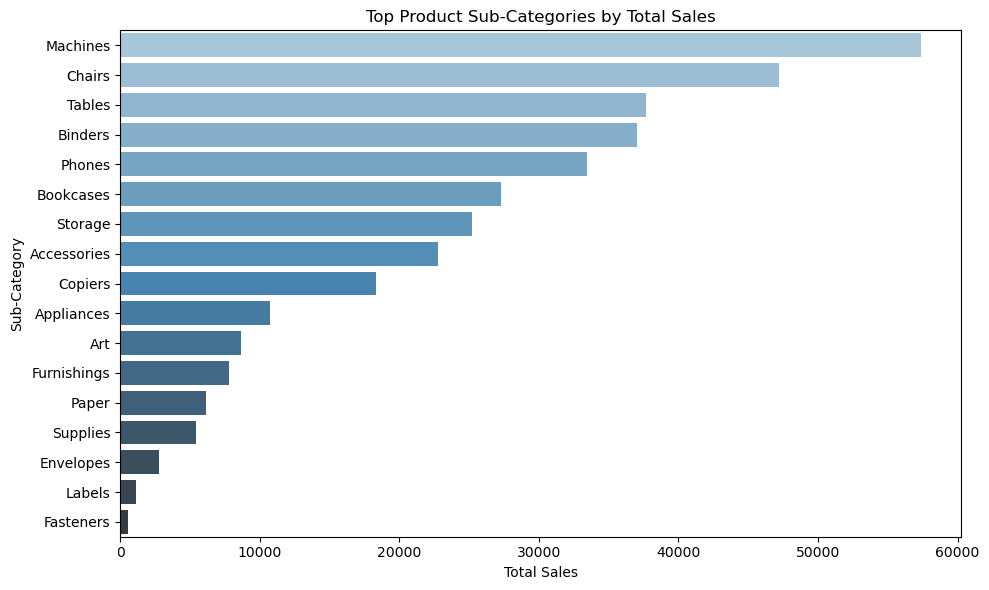

In [35]:
# Group by Sub-Category, then sum the sales and sort result in descending order
sales_by_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

#Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_subcat.values, y=sales_by_subcat.index, palette='Blues_d')
plt.title('Top Product Sub-Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

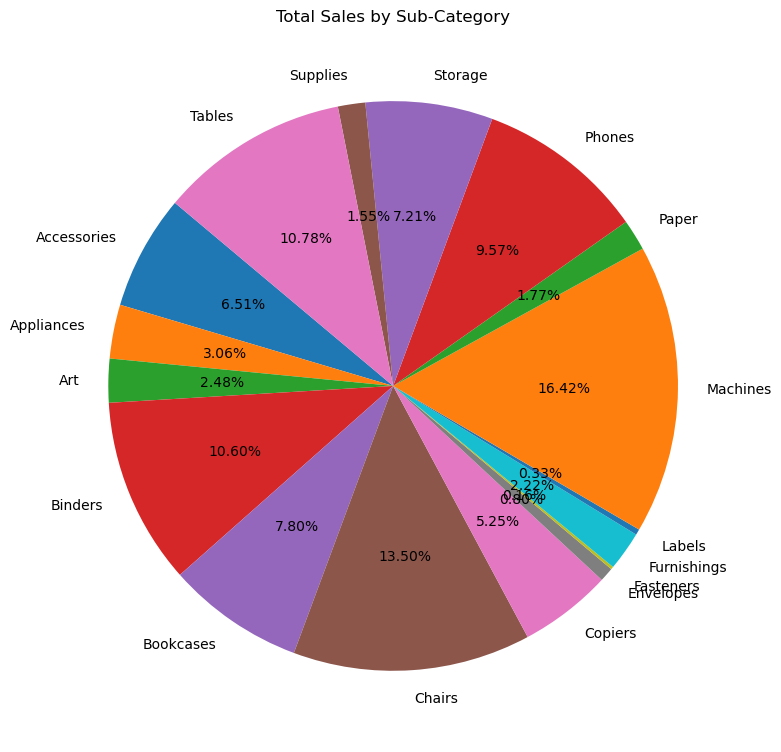

In [36]:
# Step 1: Group by Sub-category and sum total sales (Sales)
item_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

#Step 2: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(item_sales["Sales"], labels=item_sales["Sub-Category"], autopct="%1.2f%%", startangle=140)

#Step 3: Customize the chart
plt.title("Total Sales by Sub-Category")
plt.tight_layout()
plt.show()

### 2. Shipping methods that are leadings to delays

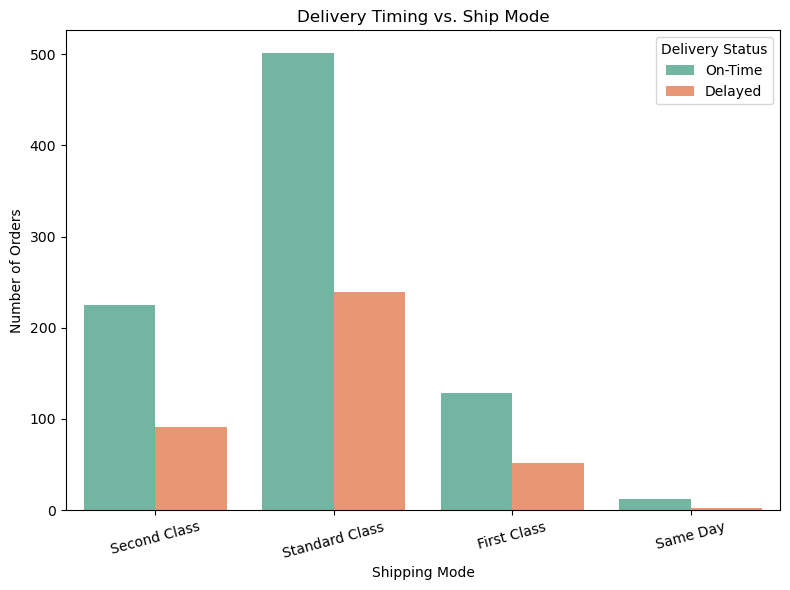

In [37]:
# Define "On-Time" vs "Delayed" (>20 days = Delayed)
df['Delivery_Timing'] = df['Days'].apply(lambda x: 'On-Time' if x <= 20 else 'Delayed')

# Count plot: Delivery timing by Ship Mode
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Ship Mode',hue='Delivery_Timing',palette='Set2')
plt.title('Delivery Timing vs. Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\Aina.C\AppData\Local\Temp\ipykernel_45244\3469410329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_days_courier.index, y=avg_days_courier.values, palette='YlOrBr')


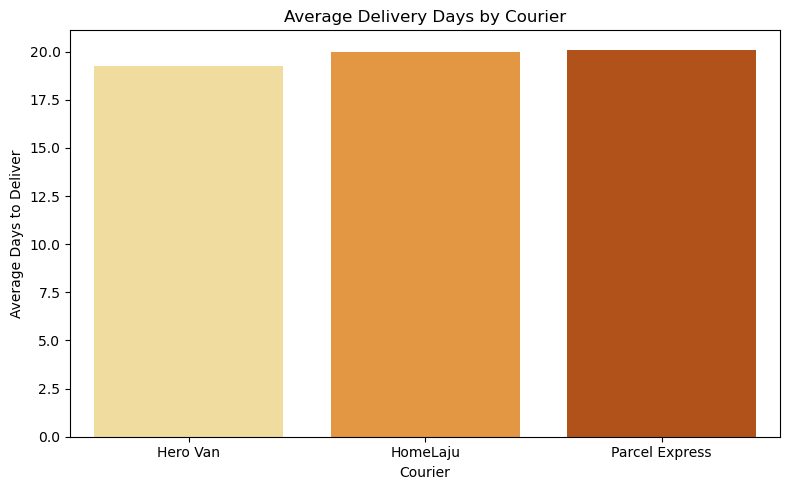

In [26]:
# Group by Courier and calculate mean delivery days
avg_days_courier = df.groupby('Courier')['Days'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_days_courier.index, y=avg_days_courier.values, palette='YlOrBr')
plt.title('Average Delivery Days by Courier')
plt.ylabel('Average Days to Deliver')
plt.xlabel('Courier')
plt.tight_layout()
plt.show()


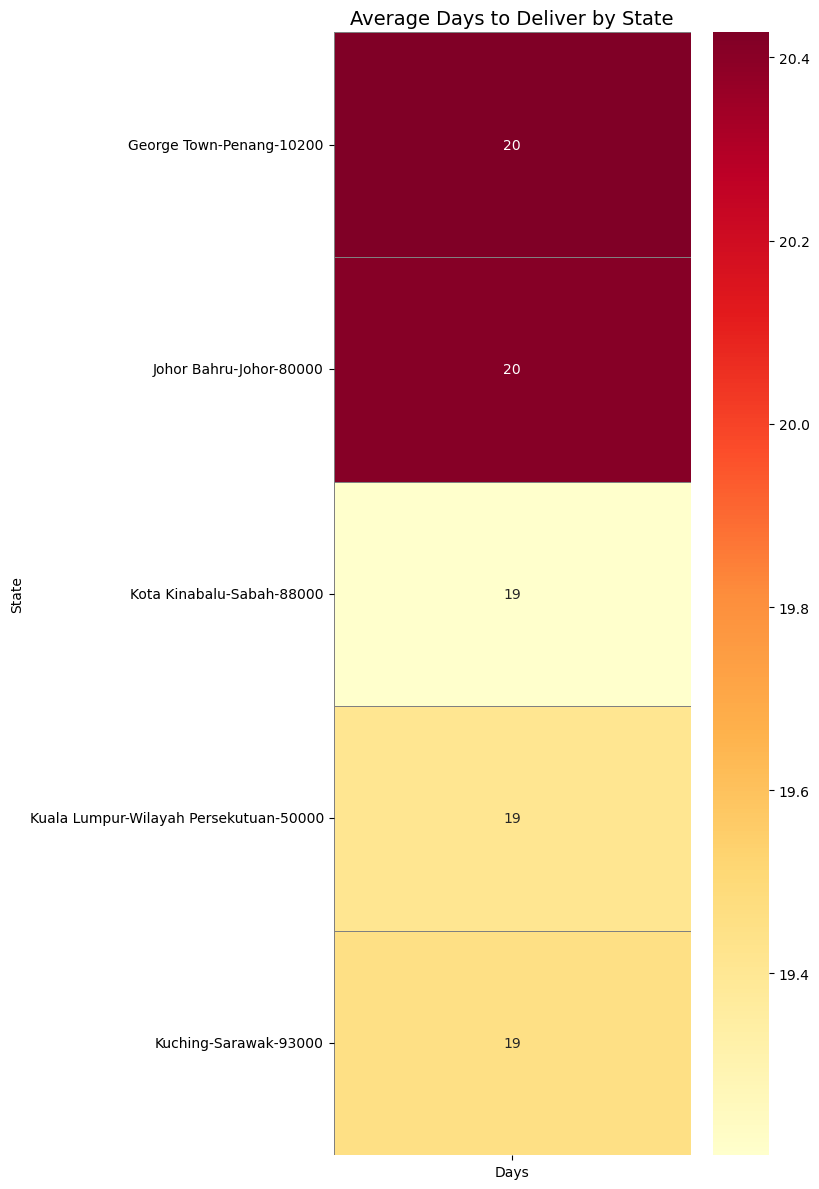

In [38]:
# Pivot the table (Heatmap needs 2D data)
# Use State as rows and a dummy column for plotting
heatmap_data = df.pivot_table(index='City, State and Postal code', values='Days')

# Plot heatmap
plt.figure(figsize=(8, 12))  
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Average Days to Deliver by State', fontsize=14)
plt.xlabel('')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### 3. Customer segments that are most profitable

C:\Users\Aina.C\AppData\Local\Temp\ipykernel_34844\2250362162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_segment, x='Segment', y='Profit', palette='Greens')


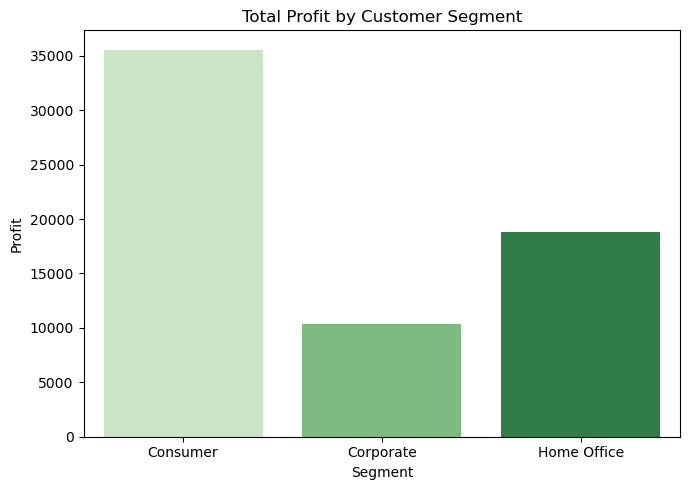

In [39]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=profit_by_segment, x='Segment', y='Profit', palette='Greens')
plt.title('Total Profit by Customer Segment')
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

## 5️⃣ Data Insights

Summarize your main takeaways. What patterns or trends did you find?

•	Technology is the most lucrative category, with high sales and profit.

•	The choice of shipping method greatly impacts delivery reliability. Upgrading ship mode reduces delays.

•	Targeted strategies for each customer’s segment can optimize both sales and fulfillment efficiency.
